### Next Word Prediction
### Dataset 1- Mother Earth

In [1]:
import tensorflow as tf
from keras.preprocessing.text import Tokenizer
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
import pickle
import numpy as np
import os

In [5]:
file = open("Mother_Earth.txt", "r", encoding = "utf8")
lines = []

In [6]:
for i in file:
    lines.append(i)

In [7]:
print("The First Line: ", lines[0])
print("The Last Line: ", lines[-1])

The First Line:  THE CHILD AND ITS ENEMIES.

The Last Line:  



In [8]:
file = open("Mother_Earth.txt", "rt")
data = file.read()
words = data.split()

In [9]:
print('Number of words in text file :', len(words))

Number of words in text file : 21138


### Cleaning Data 

In [10]:
data = ""

In [11]:
for i in lines:
    data = ' '. join(lines)

In [12]:
data = data.replace('\n', '').replace('\r', '').replace('\ufeff', '')
data[:360]

'THE CHILD AND ITS ENEMIES.  By EMMA GOLDMAN.   Is the child to be considered as an individuality, or as an object to be moulded according to the whims and fancies of those about it? This seems to me to be the most important question to be answered by parents and educators. And whether the child is to grow from within, whether all that craves expression will '

In [13]:
import string

In [14]:
translator = str.maketrans(string.punctuation, ' '*len(string.punctuation)) #map punctuation to space
new_data = data.translate(translator)

In [15]:
new_data[:500]

'THE CHILD AND ITS ENEMIES   By EMMA GOLDMAN    Is the child to be considered as an individuality  or as an object to be moulded according to the whims and fancies of those about it  This seems to me to be the most important question to be answered by parents and educators  And whether the child is to grow from within  whether all that craves expression will be permitted to come forth toward the light of day  or whether it is to be kneaded like dough through external forces  depends upon the prop'

In [16]:
z = []

In [17]:
for i in data.split():
    if i not in z:
        z.append(i)

In [18]:
data = ' '.join(z)
data[:500]

'THE CHILD AND ITS ENEMIES. By EMMA GOLDMAN. Is the child to be considered as an individuality, or object moulded according whims and fancies of those about it? This seems me most important question answered by parents educators. And whether is grow from within, all that craves expression will permitted come forth toward light day; it kneaded like dough through external forces, depends upon proper answer this vital question. The longing best noblest our times makes for strongest individualities. '

### Tokenization

In [19]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts([data])

In [20]:
# saving the tokenizer for predict function.
pickle.dump(tokenizer, open('tokenizer1.pkl', 'wb'))

In [21]:
sequence_data = tokenizer.texts_to_sequences([data])[0]
sequence_data

[5,
 30,
 7,
 222,
 449,
 88,
 450,
 89,
 31,
 5,
 30,
 2,
 42,
 451,
 139,
 223,
 452,
 90,
 453,
 1082,
 454,
 1083,
 7,
 1084,
 140,
 455,
 456,
 8,
 32,
 1085,
 11,
 141,
 457,
 458,
 459,
 88,
 142,
 1086,
 7,
 1087,
 31,
 1088,
 91,
 92,
 143,
 9,
 1089,
 460,
 43,
 1090,
 44,
 1091,
 1092,
 93,
 17,
 8,
 1093,
 461,
 1094,
 1095,
 1096,
 224,
 1097,
 1098,
 1099,
 1100,
 32,
 1101,
 458,
 5,
 1102,
 1103,
 1104,
 144,
 225,
 1105,
 94,
 1106,
 1107,
 462,
 1108,
 95,
 463,
 1109,
 1110,
 19,
 1111,
 1112,
 1113,
 1114,
 226,
 227,
 464,
 465,
 228,
 8,
 33,
 1115,
 24,
 96,
 1116,
 1117,
 1118,
 20,
 97,
 1119,
 229,
 1120,
 230,
 466,
 145,
 146,
 98,
 146,
 147,
 231,
 45,
 232,
 1121,
 99,
 233,
 30,
 234,
 17,
 146,
 235,
 467,
 1122,
 1123,
 462,
 468,
 469,
 1124,
 470,
 1125,
 1126,
 471,
 1127,
 1128,
 1129,
 236,
 1130,
 148,
 1131,
 1132,
 1133,
 1134,
 222,
 1135,
 1136,
 1137,
 21,
 1138,
 12,
 6,
 472,
 3,
 1139,
 149,
 150,
 473,
 1140,
 237,
 1141,
 1142,
 1143,
 

In [22]:
tokenizer.word_index

{'you': 1,
 'to': 2,
 'but': 3,
 'life': 4,
 'the': 5,
 'well': 6,
 'and': 7,
 'it': 8,
 'that': 9,
 'no': 10,
 'me': 11,
 'not': 12,
 'i': 13,
 'self': 14,
 'yes': 15,
 'then': 16,
 'day': 17,
 'him': 18,
 'a': 19,
 'man': 20,
 'one': 21,
 'so': 22,
 'do': 23,
 'in': 24,
 'more': 25,
 'here': 26,
 'why': 27,
 'again': 28,
 'bertha': 29,
 'child': 30,
 'is': 31,
 'this': 32,
 'must': 33,
 'world': 34,
 'home': 35,
 'they': 36,
 'how': 37,
 'free': 38,
 'laughs': 39,
 'erna': 40,
 '1': 41,
 'be': 42,
 'will': 43,
 'come': 44,
 'are': 45,
 'with': 46,
 'on': 47,
 'because': 48,
 'them': 49,
 'now': 50,
 'there': 51,
 'good': 52,
 'did': 53,
 'marriage': 54,
 'demand': 55,
 'drama': 56,
 'rita': 57,
 'softly': 58,
 'indeed': 59,
 'he': 60,
 'himself': 61,
 'friedrich': 62,
 'freedom': 63,
 'right': 64,
 'civilization': 65,
 'society': 66,
 'down': 67,
 'true': 68,
 'long': 69,
 'see': 70,
 'earth': 71,
 'what': 72,
 'her': 73,
 'she': 74,
 'my': 75,
 'impossible': 76,
 'happiness': 77,
 '

In [23]:
vocab_size = len(tokenizer.word_index) + 1
print(vocab_size)

4234


In [24]:
sequences = []

In [25]:
for i in range(1, len(sequence_data)):
    words = sequence_data[i-1:i+1]
    sequences.append(words)

In [26]:
print("The Length of sequences are: ", len(sequences))
sequences = np.array(sequences)
sequences[:10]

The Length of sequences are:  6435


array([[  5,  30],
       [ 30,   7],
       [  7, 222],
       [222, 449],
       [449,  88],
       [ 88, 450],
       [450,  89],
       [ 89,  31],
       [ 31,   5],
       [  5,  30]])

In [27]:
X = []
y = []
total_words_dropped = 0

In [28]:
for i in sequences:
    if len(i) > 1:
        for index in range(1, len(i)):
            X.append(i[:index])
            y.append(i[index])
    else:
        total_words_dropped += 1

In [29]:
print("Total Single Words Dropped are:", total_words_dropped)

Total Single Words Dropped are: 0


In [30]:
print("The Data is: ", X[:5])
print("The responses are: ", y[:5])

The Data is:  [array([5]), array([30]), array([7]), array([222]), array([449])]
The responses are:  [30, 7, 222, 449, 88]


In [31]:
X = tf.keras.preprocessing.sequence.pad_sequences(X)

In [32]:
y = to_categorical(y, num_classes=vocab_size)
y[:5]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

### Creating the model 

In [33]:
model = Sequential()
model.add(Embedding(vocab_size, 10, input_length=1))
model.add(LSTM(1000, return_sequences=True))
model.add(LSTM(1000))
model.add(Dense(1000, activation="relu"))
model.add(Dense(vocab_size, activation="softmax"))

In [34]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 1, 10)             42340     
                                                                 
 lstm (LSTM)                 (None, 1, 1000)           4044000   
                                                                 
 lstm_1 (LSTM)               (None, 1000)              8004000   
                                                                 
 dense (Dense)               (None, 1000)              1001000   
                                                                 
 dense_1 (Dense)             (None, 4234)              4238234   
                                                                 
Total params: 17,329,574
Trainable params: 17,329,574
Non-trainable params: 0
_________________________________________________________________


### Plot the model 

In [35]:
from tensorflow import keras
from keras.utils.vis_utils import plot_model

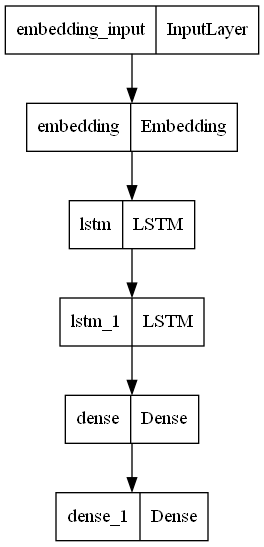

In [36]:
keras.utils.plot_model(model, to_file='model.png', show_layer_names=True)

In [37]:
#Callbacks
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.callbacks import TensorBoard

In [38]:
checkpoint = ModelCheckpoint("weights_3.h5", monitor='loss', verbose=1,
save_best_only=True, mode='auto')

In [39]:
reduce = ReduceLROnPlateau(monitor='loss', factor=0.2, patience=3, min_lr=0.0001, verbose = 1)

In [40]:
logdir='logsnextword1'
tensorboard_Visualization = TensorBoard(log_dir=logdir)

### Callbacks

In [41]:
model.compile(loss="categorical_crossentropy", optimizer=Adam(lr=0.001),metrics="accuracy")

In [46]:
model.evaluate(X,y)

202/202 [==============================] - 6s 20ms/step - loss: 8.3509 - accuracy: 0.0000e+00


[8.35091495513916, 0.0]

### Fit the model

In [42]:
model = model.fit(X, y, epochs=50, batch_size=64, callbacks=[checkpoint, reduce, tensorboard_Visualization])

Epoch 1/50
101/101 [==============================] - ETA: 0s - loss: 8.3575 - accuracy: 0.0012
Epoch 1: loss improved from inf to 8.35750, saving model to weights_3.h5
101/101 [==============================] - 28s 222ms/step - loss: 8.3575 - accuracy: 0.0012 - lr: 0.0010
Epoch 2/50
101/101 [==============================] - ETA: 0s - loss: 8.2998 - accuracy: 0.0023
Epoch 2: loss improved from 8.35750 to 8.29978, saving model to weights_3.h5
101/101 [==============================] - 20s 202ms/step - loss: 8.2998 - accuracy: 0.0023 - lr: 0.0010
Epoch 3/50
101/101 [==============================] - ETA: 0s - loss: 8.1455 - accuracy: 0.0030
Epoch 3: loss improved from 8.29978 to 8.14546, saving model to weights_3.h5
101/101 [==============================] - 22s 214ms/step - loss: 8.1455 - accuracy: 0.0030 - lr: 0.0010
Epoch 4/50
101/101 [==============================] - ETA: 0s - loss: 7.9045 - accuracy: 0.0031
Epoch 4: loss improved from 8.14546 to 7.90453, saving model to weights_3.

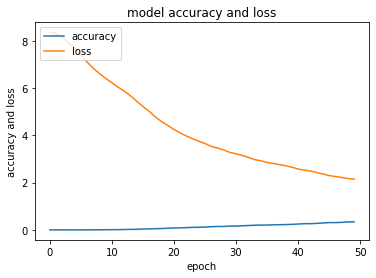

In [43]:
import matplotlib.pyplot as plt
plt.plot(model.history['accuracy'])
plt.plot(model.history['loss'])
plt.title('model accuracy and loss')
plt.ylabel('accuracy and loss')
plt.xlabel('epoch')
plt.legend(['accuracy', 'loss'], loc='upper left')
plt.show()

In [47]:
model.save_weights("C:\\Users\\deepak\\Downloads\\Set 3\\weights_3.h5")

In [48]:
vocab_array = np.array(list(tokenizer.word_index.keys()))

In [49]:
vocab_array

array(['you', 'to', 'but', ..., '217', 'square', 'station'], dtype='<U18')

In [50]:
# Importing the Libraries
from tensorflow.keras.models import load_model
import numpy as np
import pickle

In [53]:
# Load the model and tokenizer
model.load_weights("C:\\Users\\deepak\\Downloads\\Set 3\\weights_3.h5")
tokenizer = pickle.load(open('C:\\Users\\deepak\\Downloads\\Set 3\\tokenizer1.pkl', 'rb'))

In [54]:
def make_prediction(text, n_words):
    for i in range(n_words):
        text_tokenize = tokenizer.texts_to_sequences([text])
        text_padded = tf.keras.preprocessing.sequence.pad_sequences(text_tokenize, maxlen=14)
        prediction = np.squeeze(np.argmax(model.predict(text_padded), axis=-1))
        prediction = str(vocab_array[prediction - 1])
        print(vocab_array[np.argsort(model.predict(text_padded)) - 1].ravel()[:-3])
        text += " " + prediction
    return text

In [55]:
make_prediction("child",5)

1/1 [==============================] - 0s 53ms/step
['ravenous' 'discredited' 'responding' ... 'show' 'happened' 'paine']
1/1 [==============================] - 0s 47ms/step
['ravenous' 'superficially' 'responding' ... 'show' 'quivering' 'paine']
1/1 [==============================] - 0s 46ms/step
['superficially' 'ravenous' 'responding' ... 'show' 'paine' 'quivering']
1/1 [==============================] - 0s 47ms/step
['superficially' 'ravenous' 'alliance' ... 'close' 'paine' 'hot']
1/1 [==============================] - 0s 45ms/step
['superficially' 'angel' 'alliance' ... 'show' 'vacation' 'close']


'child vacation vacation vacation quivering quivering'

### Observation 

We are able to develop a decent next word prediction model and are able to get a declining loss and an overall
decent performance.